## 0. Computer vision libraries in PyTorch

Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. |
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. |
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  |
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

Now we've covered some of the most important PyTorch computer vision libraries, let's import the relevant dependencies.


In [1]:
# Import pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu118
0.16.0+cu118


## 1. Getting a dataset

The dataset we'll use is FashionMNIST

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # Where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    # What tranforms we want apply for each item in dataset
    transform=torchvision.transforms.ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup de testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


100%|██████████| 26421880/26421880 [00:01<00:00, 13916616.25it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 261186.07it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5054118.68it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 22468550.46it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 Check input and output shapes of data

In [8]:
# Check the shape of out image
print(f"Image shape: {image.shape} -> [color_chanels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_chanels, height, width]
Image label: Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

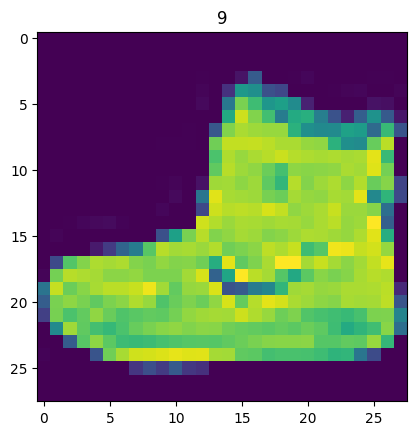

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
# plt.imshow input is (h, w, c) or (h, c) to gray scale images
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)


Text(0.5, 1.0, 'Ankle boot')

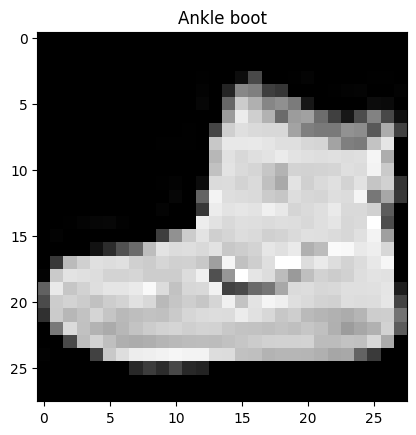

In [10]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])

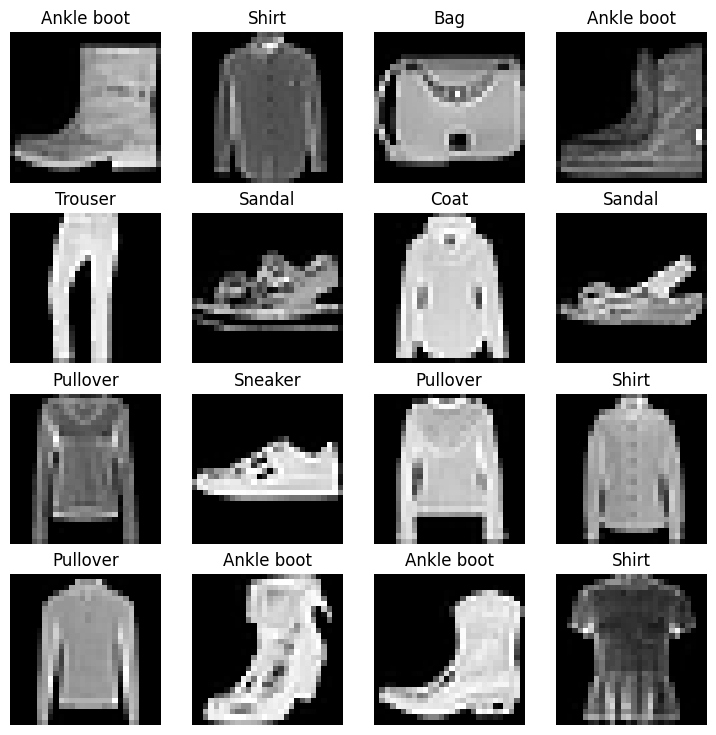

In [11]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows * cols +1):
  random_idx = int(torch.randint(0, len(train_data), size=[1]).item())
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

Do you think these items of clothing(images) could be modeiled with pure linear lines?

Or  do you think  we'll need non-learities?

In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

from numpy.lib.function_base import iterable
## 2. Prepare DataLoader

Right now, out data is in the form of pytorch dataset

DataLoader turn our dataset into a pytorch iterable

More specifically, we want to turn our data into batchs (or mini-batchs)

Why would we do this?

1. It's more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit, so we break it donw to 32 images at a time (batch size of 32).

2. It give our neural network more chances to update it's gradients per epoch.


In [13]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into interables(batches)
train_dataloader = DataLoader(
    train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch
    shuffle=True # shuffle data every epoch
)

test_dataloader = DataLoader(
  test_data,
  batch_size= BATCH_SIZE,
  shuffle=False # Don't necessarily have to shuffle the testing data
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fa2aff5bb80>,
 <torch.utils.data.dataloader.DataLoader at 0x7fa2b04975b0>)

In [14]:
# Let's check out what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train DataLoader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test DataLoader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fa2aff5bb80>, <torch.utils.data.dataloader.DataLoader object at 0x7fa2b04975b0>)
Length of train DataLoader: 1875 batches of 32...
Length of test DataLoader: 313 batches of 32...


In [15]:
# Check out what's inside the training dataloader
train_features_batch, train_lables_batch = next(iter(train_dataloader))
train_features_batch.shape, train_lables_batch.shape # [32 images, 1 channel_color, 28px height, 28px width]

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [16]:
# Cada batch é um iteravel com 2 posições, a primeira são os dados e asegunda são os labels
list(train_dataloader)[:2]

[[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            ...,
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
  
  
          [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            ...,
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
  
  
          [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]

Image size: torch.Size([1, 28, 28])
Label: 6. label size: torch.Size([])


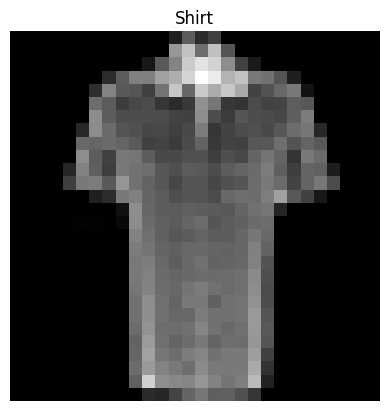

In [17]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_lables_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}. label size: {label.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model

A baselinear model is a simple model your will try and improve upon  with subsequent models/experiments

In oher words: start simply and add complexity when necessary

In [18]:
# Create a flatten layer
flatten_model = nn.Flatten() # All modules funciton as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # Perform forward pass

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [19]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # Neural networks like their inputs in vector form
        nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
        nn.Linear(in_features=hidden_units, out_features=output_shape),
    )

  def forward(self, x):
    return self.layer_stack(x)

In [20]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # This is 28*28
    hidden_units=10, # How many units in the hidden layer
    output_shape=len(class_names) # One for each class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x) # One logit per class

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [22]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer, and evaluantion metrics

- Loss function: Sice we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss`
- Optimizer: Our optimizer `torch.optim.SGD()` (stochastic gradient descent)
- Evaluation metric - Since we're working on a classification problem, let's use accuracy as out evaluation metric

In [23]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [24]:
# Import accuracy metrics
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model_0.parameters(),
    lr = 0.1
)

In [25]:
accuracy_fn(torch.tensor([1, 1, 1]), torch.tensor([1, 0, 0]))

33.33333333333333

### 3.2 Creating a function to time our experiments

Machine learning is very experimental

Two of tha mains things you'll often want to track are:
1 - Model's performance(loss and accuracy values etc)
2 - How fast it runs

In [26]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device=None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [27]:
# Example
start_time = timer()
# Some code ...
end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')

Train time on cpu: 0.000 seconds


4.426899999998568e-05

### 3.3 Creating a training loop and testing a model on batches of data

1. Loop though epochs
2. Loop though training batches, perform training steps , calculate the train loss per batch
3. Loop though test batches, perfom testing steps, calculate the test loss per batch
4. Print out what's happening
5. Time it all (for fun)

In [29]:
# Import tqdm for progess bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n-----")

  ### Training
  train_loss = 0

  #Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    # X: has 32 images
    # y: has 32 labels
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    #print(y_pred, y)
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # 3. Optimize zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimazer step
    optimizer.step()

    # Print out how many samples have been seen
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train dataloader (average loss per batch per epoch)
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss(accumatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accurary (pred need to be same as y_true)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculation on test metrics need to happen inse torch.inference_mode()
    # Divite total test loss by length of test dataloader(per batch)
    test_loss /= len(test_dataloader)

    # Divide total accuracy by length of test dataloader (per batch)
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.4f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
-----
tensor([[-4.1983e+00, -3.1693e-01, -2.0658e+00, -1.4144e+00, -2.9576e+00,
          5.4839e+00, -2.7657e+00,  5.8591e+00,  6.5386e-01,  3.0501e+00],
        [-5.2898e+00,  2.8009e-01, -2.5466e+00,  4.0760e-01, -3.9812e+00,
          4.5954e+00, -3.7624e+00,  8.7286e+00,  4.2392e-01,  1.2051e+00],
        [ 1.9671e+00,  2.2251e+00,  5.1052e+00,  4.2755e+00,  6.8893e+00,
         -7.3534e+00,  3.3509e+00, -3.1698e+00, -2.1465e+00, -5.2521e+00],
        [-6.1128e+00, -3.0992e-01, -3.4497e+00, -1.2512e+00, -4.6683e+00,
          3.6273e+00, -4.3024e+00,  1.0892e+01,  2.1697e-01,  7.4389e+00],
        [ 2.8372e+00, -1.4251e-01,  3.2129e+00,  3.5938e+00,  3.6482e+00,
         -5.1473e+00,  3.7261e+00, -3.9960e+00, -4.3368e-01, -5.2780e+00],
        [ 4.4607e-02, -3.3795e+00,  1.3474e+00, -3.8553e+00,  1.8642e-01,
         -1.4953e+00,  1.2234e+00, -4.2243e-01,  9.4987e+00, -1.7750e+00],
        [-1.6975e+00, -3.8082e+00, -5.4826e+00, -6.3247e+00, -9.5523e+00,
          1.2249

## 4. Make predictions and get Model 0 results

In [ ]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device):
  """Returns a dictionary containing the results of models predicting on data_loader."""

  loss, acc = 0, 0
  model.eval()
  model.to(device)
  with torch.inference_mode():
    for X, y in tqdm(data_loader):

      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)

      # Here we can skip the softmax to get the pred probabilities and get the position of the largest logit
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Scale the loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {
      "model_name": model.__class__.__name__,  # Only works when model was created with a class
      "model_loss": loss.item(),
      "model_acc": acc
  }

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device='cpu')

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 5 Setup dive agnosti-code(for using GPU if thereare one)


In [ ]:
# Setup device-agnostic code
import torch
device = 'cuda'
if not torch.cuda.is_available():
  device = 'cpu'

device

'cpu'

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## 6. Model 1: Build a better model with non-linearity

In [ ]:
# Create a model with non-linearity and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU(),
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)



In [ ]:
# Create a instance of model 1
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape=784, # 28*28 image
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.3.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [ ]:
model_1(train_features_batch[0].to(device))

tensor([[0.0000, 0.1190, 0.3131, 0.0000, 0.2163, 0.2084, 0.3361, 0.2066, 0.0000,
         0.0000]], grad_fn=<ReluBackward0>)

### 6.1 Setup loss, optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn

# Loss funtion
loss_fn = nn.CrossEntropyLoss() # Measures how wrong our model is
# Optimizer
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1) # Tries to update our model's parameters to reduce the loss

### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:
- training loop - `train_step()`
- testing loop - `test_step()`

In [ ]:
from tqdm.auto import tqdm

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               #device:torch.device = device):
               device:str = device):

  """Performs a traning with model trying to learning on data_loader"""

  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Put the model on target device
  model.to(device)

  #Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put the data on target device
    X, y = X.to(device), y.to(device)
    # X: has 32 images
    # y: has 32 labels

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate loss  and acc (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss

    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # Go directly from logits to prediction labels

    # 3. Optimize zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimazer step
    optimizer.step()

  # After we foward all batches and accumulate the loss and accurary we must
  # divide total train loss and accurary by length of train dataloader (average loss and accurary per batch per epoch)
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")


In [ ]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               accuracy_fn,
               #device:torch.device = device):
               device:str = device):

  """Performs a testing loop step on model over data_loader"""

  test_loss, test_acc = 0, 0

  # Put the model in eval mode
  model.eval()

  model.to(device)

  # Turn on the inference mode context manager
  with torch.inference_mode():
    for X, y in test_dataloader:

      # Send the data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred = model(X) # Output raw logits

      # 2. Calculate loss(accumatively)
      test_loss += loss_fn(test_pred, y)

      # 3. Calculate accurary (pred need to be same as y_true)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1)) # Rwar logits to predictions labels

    # Calculation on test metrics need to happen inside torch.inference_mode()
    # Divite total test loss by length of test dataloader(per batch)
    test_loss /= len(data_loader)

    # Divide total accuracy by length of test dataloader (per batch)
    test_acc /= len(data_loader)

    print(f"Test loss: {test_loss:.5f}, Test acc: {test_acc:.4f}%\n")

In [ ]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

train_time_start_on_gpu = timer()
torch.manual_seed(42)
epochs= 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------------")
  train_step(model=model_1, data_loader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn, device=device)
  test_step(model=model_1, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu, end= train_time_end_on_gpu)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------------
Train loss: 1.09199 | Train acc: 61.34%
Test loss: 0.95636, Test acc: 64.9960%

Epoch: 1
----------------
Train loss: 0.78101 | Train acc: 71.93%
Test loss: 0.72227, Test acc: 73.9117%

Epoch: 2
----------------
Train loss: 0.67027 | Train acc: 75.94%
Test loss: 0.68500, Test acc: 75.0200%

Train time on None: 36.546 seconds


**Note:** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU.

Why is this?

1. It could be that the overhead for copying data/model to and from the GPU outweights the compute benefits offered by the GPU.

2. The hardwere you're using has a better CPU in terms compute capability than the GPU.

For more: https://horace.io/brrr_intro.html

In [ ]:
# Get the result dict of model_1
model_1_results = eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
model_0_results, model_1_results

({'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.47663894295692444,
  'model_acc': 83.42651757188499},
 {'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.6850009560585022,
  'model_acc': 75.01996805111821})

In [ ]:
total_train_time_model_0, total_train_time_model_1
#next(model.parameters()).device

(54.70231904000002, 36.545798945000115)

##7 Model 2: Building a Convolutional Neural NetWork(CNN)

CNN's are also called ConvNets

CNN's are know for they capabilities to find patterns in visual data

To find out what's happening inside a CNN, se this website: https://poloclub.github.io/cnn-explainer/

In [ ]:
class FashionMNISTModelV2(nn.Module):
  """
    Model architecture that replicate the TinyVGG
    model from CNN explainer website
  """

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    """
      input_shape: Number of channel colors
      hidden_units: Neurons by layer
      output_shape: shape of out tensor(number of classes)
    """
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  # Each unit of the layer will do a convolutional operation with a diferent kernel to get diferents features
                  out_channels=hidden_units,
                  # Hyperparameters of the Conv2d layer
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),

        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
                  ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
        ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )


    self.classifier = nn.Sequential(
        # Flattening our tensor to one dimension
        nn.Flatten(),

        # There is a trick to calculates the shape of in_features after our tensor pass by the conv block and flatten
        nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
    )

  def forward(self, x:torch.Tensor):
    #print('Original shape: ', x.shape)
    x = self.conv_block_1(x)
    #print('Shape after conv_block_1: ', x.shape)
    x = self.conv_block_2(x)
    #print('Shape after conv_block_2: ', x.shape)
    x = self.classifier(x)
    #print('Shape after classfifier block: ', x.shape)

    return x


In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1 ,# One color channel
                              hidden_units=10,
                              output_shape=len(class_names)
                              ).to(device)

### 7.1 Stepping through `nn.Conv2d()`

In [ ]:
torch.manual_seed(42)

# Create a batch if images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image: {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [ ]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=(3,3), stride=1, padding=1)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape # [number of features maps, heigth of feture maps, width of feture maps]

torch.Size([10, 64, 64])

### 7.2 Stepping through `nn.MaxPool2d()`


In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# Create a sample nn.MaxPool2
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through convolutional layer: {test_image_through_conv.shape}")

# PAss data through the maxpool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through convolutional layer and max pool layer: {test_image_through_conv_and_max_pool.shape}")


Shape after going through convolutional layer: torch.Size([10, 64, 64])
Shape after going through convolutional layer and max pool layer: torch.Size([10, 32, 32])


In [ ]:
torch.manual_seed(0)

# Create a random tensor witha similar number of dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor:\n {random_tensor}")
print(f"\nRandom tensor:\n {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through tensor
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMaxPool tensor:\n {max_pool_tensor}")
print(f"\nMaxPool tensor:\n {max_pool_tensor.shape}")



Random tensor:
 tensor([[[[ 1.5410, -0.2934],
          [-2.1788,  0.5684]]]])

Random tensor:
 torch.Size([1, 1, 2, 2])

MaxPool tensor:
 tensor([[[[1.5410]]]])

MaxPool tensor:
 torch.Size([1, 1, 1, 1])


In [ ]:
# Create a random tensor
rand_image_tensor = torch.randn(size=(1, 1,28,28)).to(device)
rand_image_tensor.shape

torch.Size([1, 1, 28, 28])

In [ ]:
# Pass the random image tensor through the model
model_2(rand_image_tensor)

tensor([[ 0.0313, -0.0966,  0.0716, -0.0344,  0.0012,  0.0078,  0.0092,  0.0027,
          0.0021, -0.0100]], grad_fn=<AddmmBackward0>)

### 7.3 Setup the loss function and the optimizer

In [ ]:
# Setup the loss function/optimizer/eval metrics
from helper_functions import accuracy_fn

loss_fn2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.SGD(model_2.parameters(), lr=0.1)


In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### 7 Training and test model 2 with our train and test functions

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


# Measure time
from timeit import default_timer as timer
train_time_start_model_2 =timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------------")
  train_step(model=model_2, data_loader=train_dataloader, loss_fn=loss_fn2, optimizer=optimizer2, accuracy_fn=accuracy_fn, device=device)
  test_step(model=model_2, data_loader=test_dataloader, loss_fn=loss_fn2, accuracy_fn=accuracy_fn, device=device)


train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------------
Train loss: 0.59518 | Train acc: 78.38%
Test loss: 0.39500, Test acc: 85.9924%

Epoch: 1
----------------
Train loss: 0.36536 | Train acc: 86.90%
Test loss: 0.35244, Test acc: 86.9109%

Epoch: 2
----------------
Train loss: 0.32588 | Train acc: 88.13%
Test loss: 0.32719, Test acc: 88.0691%

Train time on cpu: 180.007 seconds


In [ ]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn2,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

## 8. Compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327190,88.069089


In [ ]:
# Add training time to results comparasion
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,54.702319
1,FashionMNISTModelV1,0.685001,75.019968,36.545799
2,FashionMNISTModelV2,0.327190,88.069089,180.006689


Text(0, 0.5, 'MOdel')

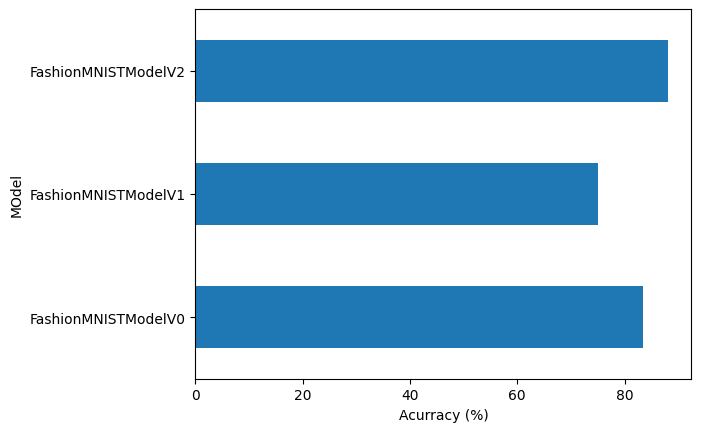

In [ ]:
# Visualize our model results
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('Acurracy (%)')
plt.ylabel('MOdel')

## 9. Make and evaluation random predictions with the best model

In [ ]:
def make_predictions(model: torch.nn.Module, data: list, device:torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare sample
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability(logits to predicitons probabilities)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # get pred_props of GPU for futher calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn a list in a tensor
  return torch.stack(pred_probs)




In [ ]:
import random
#random.seed(42)

test_samples = []
test_labels = []

# Get 9 random samples from test_data dataset
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the  first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Ankle boot')

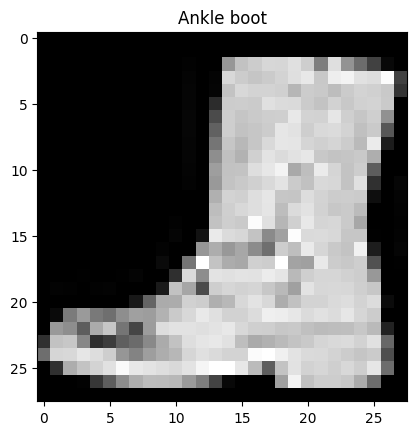

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_predictions(model=model_2, data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[1.8119e-05, 2.8321e-06, 3.7487e-05, 5.6563e-06, 9.8155e-06, 8.9272e-04,
         5.4972e-05, 9.6236e-04, 1.5139e-03, 9.9650e-01],
        [9.5815e-01, 4.8394e-05, 4.2009e-03, 4.2729e-04, 2.6104e-04, 1.5873e-06,
         3.6328e-02, 6.4340e-07, 5.7627e-04, 5.4384e-06]])

In [ ]:
# Convert predictions probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes, test_labels

(tensor([9, 0, 7, 9, 7, 3, 0, 8, 3]), [9, 0, 7, 9, 7, 3, 0, 8, 3])

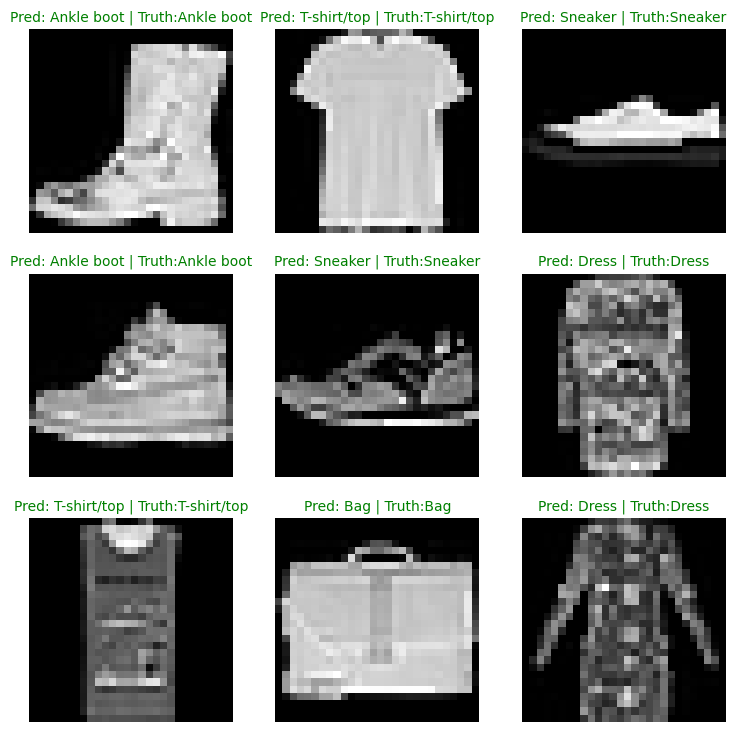

In [ ]:
# Plot predictions
plt.figure(figsize=(9,9))
nrow=3
ncols=3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrow, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap='gray')

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label(in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth:{truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')

  plt.axis(False)

## 10. Making a confusion matrix for futher predictions evaluation

A confusion matrix is a fantastic way of evaluating your classification models visually

1. Make predictions with our treined model on the test dataset
2. Make a consufion matrix `torchmetrics.ConfusionMatrix` - https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix` - https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [ ]:
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []

model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data to target device
    X, y = X.to(device), y.to(device)

    # Do the forward pass
    y_logit = model_2(X)

    # Turn predictions from logits to predictions probabilities and then predcitions labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=1).argmax(dim=1)

    # Put predictions on cpu for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate the list of predictions into a tensor
y_preds_tensor = torch.cat(y_preds)

y_preds_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 5])

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.0


In [ ]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.0


In [ ]:
test_data.classes, test_data.targets

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 tensor([9, 2, 1,  ..., 8, 1, 5]))

In [ ]:
len(class_names)

10

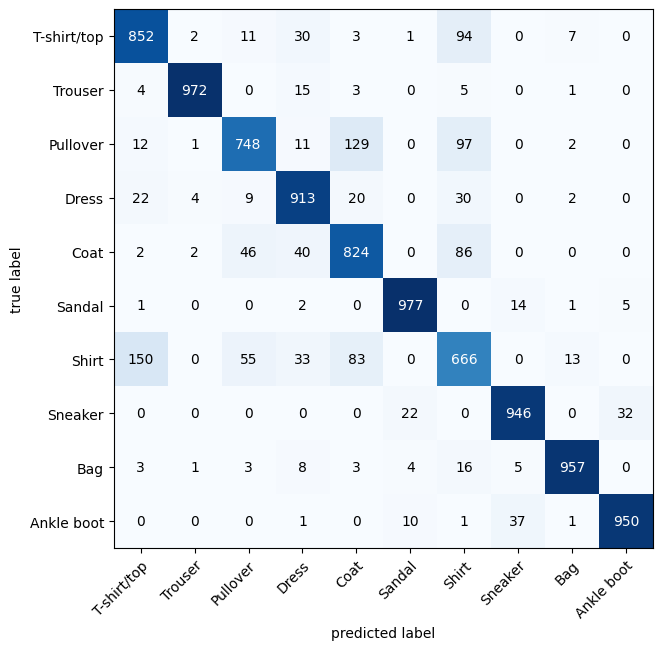

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_preds_tensor,
                          target=test_data.targets
                        )


# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # Turn the raw and column labels into class names
    figsize=(10,7)
)

In [ ]:
## 11. Save and loade our best performing model
from pathlib import Path

# Create a model directory path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH  / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to target device
loaded_model_2.to(device)


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Evaluete the loaded model
torch.manual_seed(42)
loaded_model_2_results = eval_model(model=loaded_model_2,
           data_loader=test_dataloader,
           loss_fn=loss_fn2,
           accuracy_fn=accuracy_fn,
           device=device)

model_2_results, loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

({'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.32718968391418457,
  'model_acc': 88.06908945686901},
 {'model_name': 'FashionMNISTModelV2',
  'model_loss': 0.32718968391418457,
  'model_acc': 88.06908945686901})

In [ ]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)